In [5]:
# 연습문제 3.1.6
a = np.array([[4], [5], [2], [2]])
b = np.array([[4], [0], [2], [0]])
c = np.array([[2], [2], [0], [1]])
# (1) 유클리드 거리 :b - c가 가장 가깝다. a - b 가 가장 멀다
print ("a - b = ", np.linalg.norm(a - b))
print ("b - c = ", np.linalg.norm(b - c))
print ("a - c = ", np.linalg.norm(a - c))

a - b =  5.385164807134504
b - c =  3.605551275463989
a - c =  4.242640687119285


In [19]:
# (2) 코사인 유사도 a - c가 가장 유사하다,  b - c가 가장 멀다
print("a - b", 1 - (a.T @ b)[0][0] / (np.linalg.norm(a) * np.linalg.norm(b)))
print("b - c", 1 - (b.T @ c)[0][0] / (np.linalg.norm(b) * np.linalg.norm(c)))
print("a - c", 1 - (a.T @ c)[0][0] / (np.linalg.norm(a) * np.linalg.norm(c)))

a - b 0.36112343500006017
b - c 0.40371520600005606
a - c 0.04761904761904767


In [25]:
# 연습문제 3.2.5
# (1)
x1 = np.array([[1],[1]])
m1 = x1 @ x1.T
np.linalg.matrix_rank(m1)

1

In [31]:
# (2)
x2 = np.array([[1],[-1]])
print(np.hstack([x1,x2]))
print(np.vstack([x1.T,x2.T]))
m2 = np.hstack([x1,x2]) @ np.vstack([x1.T,x2.T])
np.linalg.matrix_rank(m2)

[[ 1  1]
 [ 1 -1]]
[[ 1  1]
 [ 1 -1]]


2

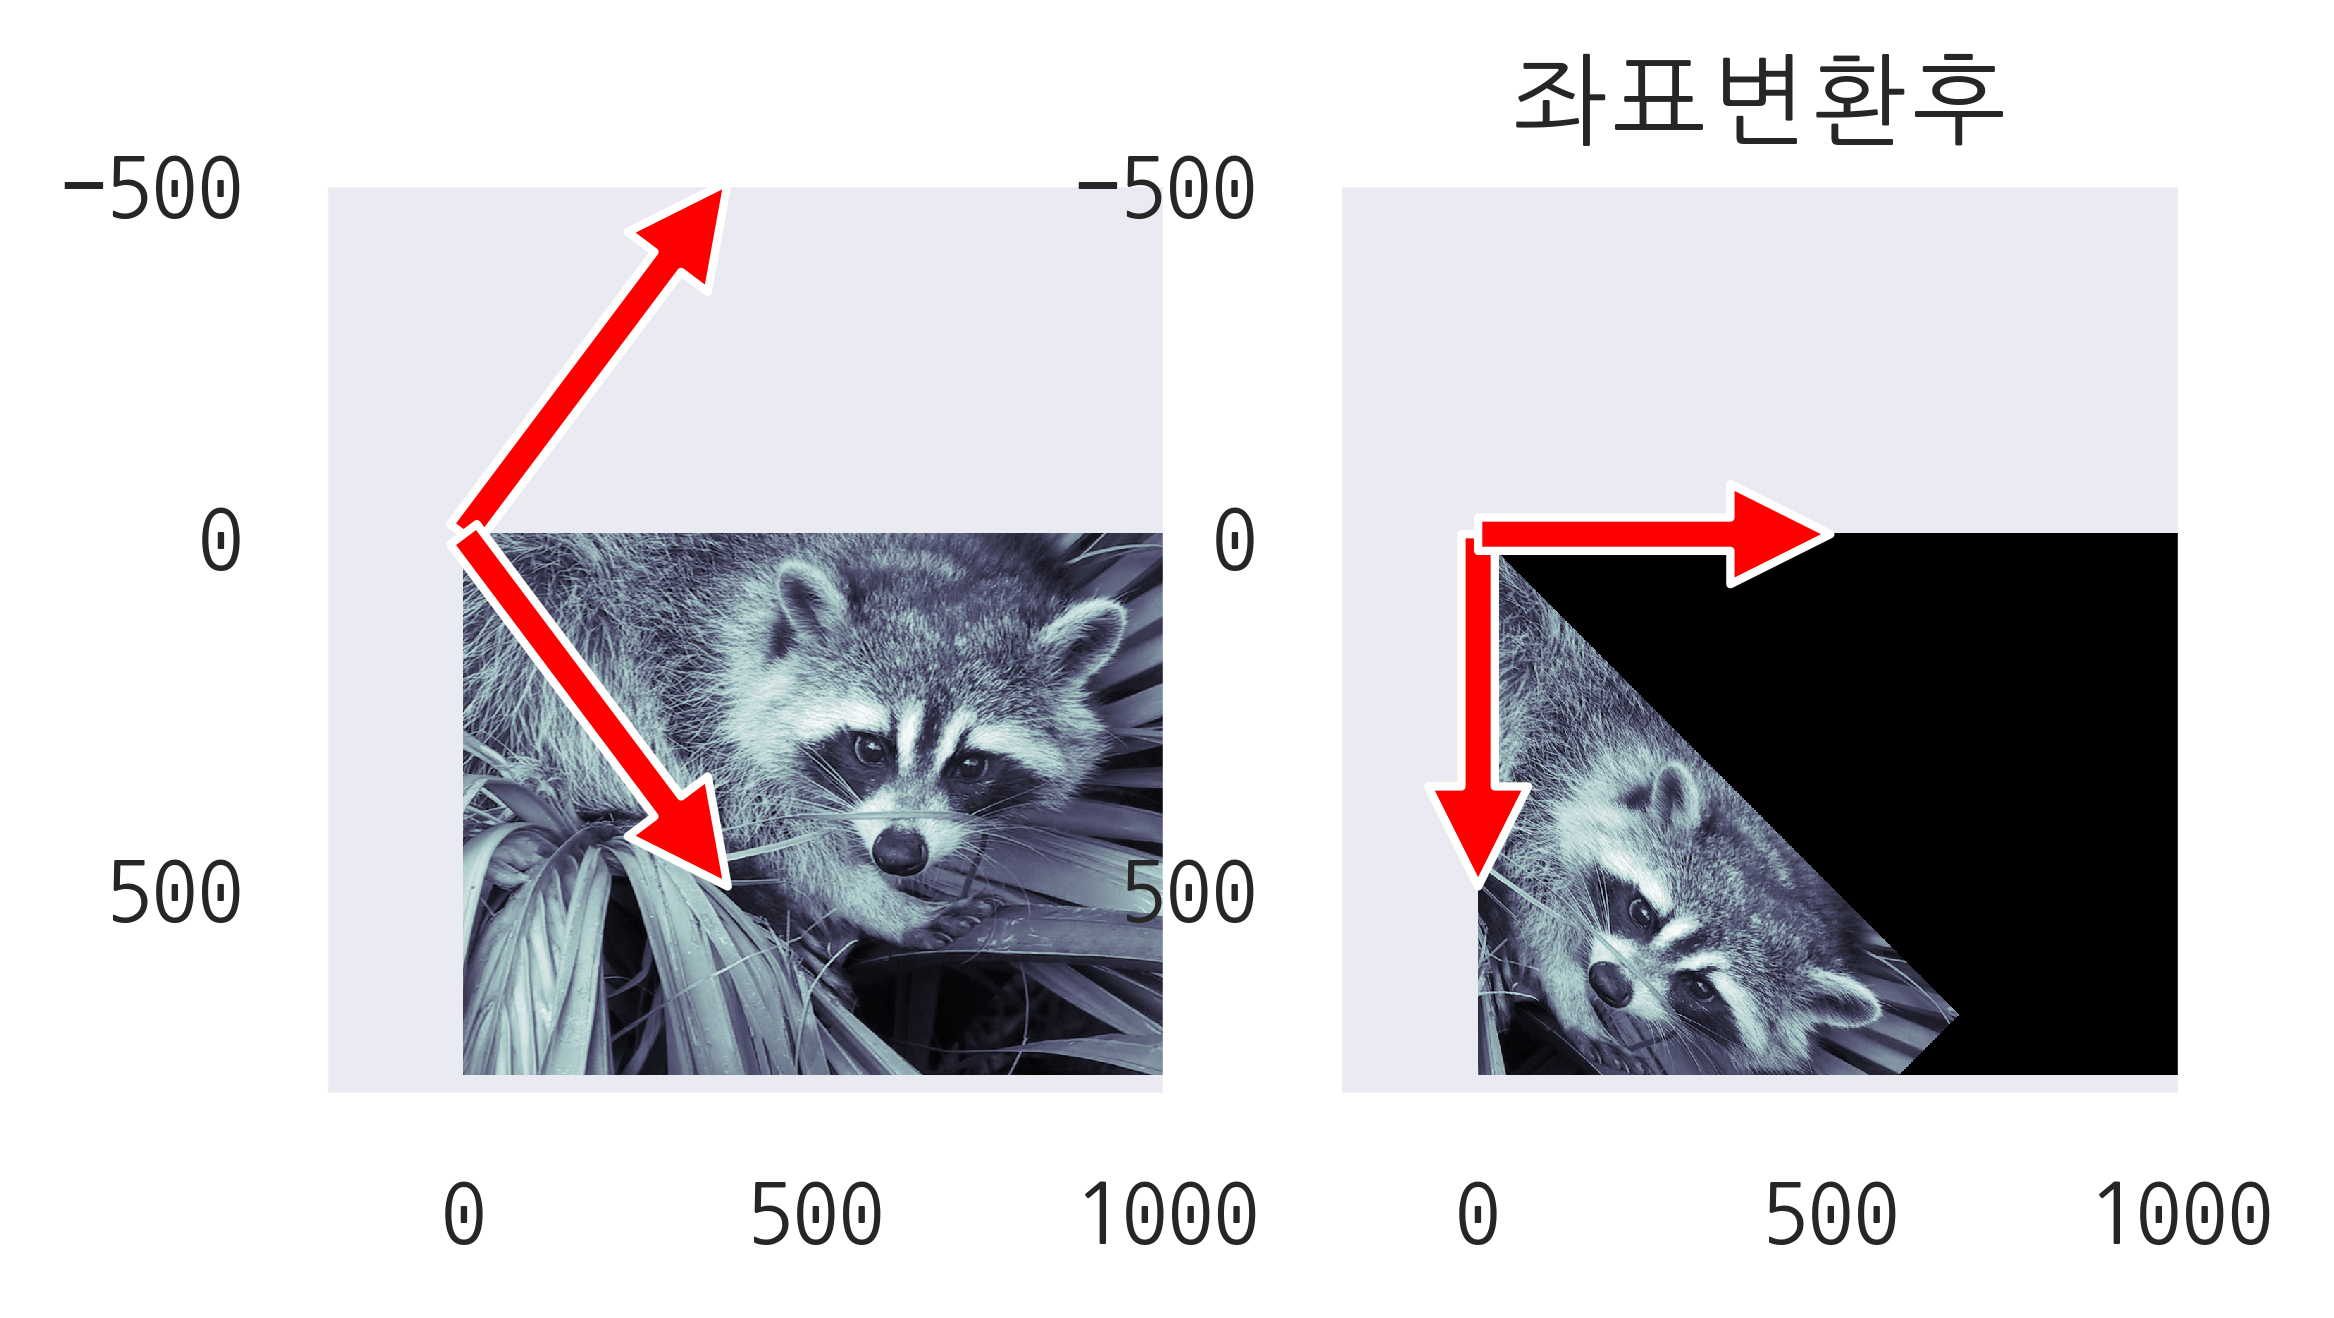

In [9]:
# 3.2 좌표변환 실습
# 연습문제 3.2.9

import scipy as sp
import scipy.misc
import scipy.ndimage
f = sp.misc.face (gray = True)

e1 = np.array([0, -1])
e2 = np.array([1,0])
E = np.vstack([e1,e2]).T
g1 = np.array([1,0.75])
g2 = np.array([-1,0.75])
A = np.vstack([g1,g2]).T

f1= sp.ndimage.affine_transform(f,A)

plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone)
plt.annotate('', xy=500*np.dot(E, g1), xytext=(0,0), arrowprops = dict(facecolor = 'red'))
plt.annotate('', xy=500*np.dot(E, g2), xytext=(0,0), arrowprops = dict(facecolor = 'red'))
plt.grid(False)
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.subplot(122)
plt.imshow(f1, cmap = mpl.cm.bone)
plt.annotate('', xy=(0,500), xytext = (0,0), arrowprops = dict(facecolor='red'))
plt.annotate('', xy=(500,0), xytext = (0,0), arrowprops = dict(facecolor='red'))
plt.grid(False)
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환후")
plt.show()

In [2]:
# 연습문제 3.3.2
D = np.array([[2,1],[1,2]])
w1, V1 = np.linalg.eig(D)
print(w1)
print(V1)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [4]:
# 고유벡터의 계산
A = np.array([[1,-2],[2,-3]])
w1, V1 = np.linalg.eig(A)
print(w1)
print(V1)

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [5]:
# 연습문제 3.3.3
E = np.array([[2,3],[2,1]])
w1, V1 = np.linalg.eig(E)
print(w1)
print(V1)

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [6]:
# 연습문제 3.3.3
F = np.array([[1,1],[0,1]])
w1, V1 = np.linalg.eig(F)
print(w1)
print(V1)

[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]


In [7]:
# 넘파이를 사용한 고유분해
A = np.array([[1, -2], [2, -3]])
w1, V1= np.linalg.eig(A) # 고윳값 구하는 힘수
print(w1) # w2 = 고윳값
print(V1) # V2 = 고유벡터, 고유벡터는 열로 봐야함 아래의 예제는 0.83 0.55가 세트임

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [8]:
B = np.array([[2, 3], [2, 1]])
w2, V2= np.linalg.eig(B) # 고윳값 구하는 힘수
print(w2) # w2 = 고윳값
print(V2) # V2 = 고유벡터, 고유벡터는 열로 봐야함 아래의 예제는 0.83 0.55가 세트임

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [5]:
C = np.array([[0, -1], [1, 0]])
w2, V2 = np.linalg.eig(C)
print(w2) #  복소수까지 계산해줌
print(V2)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [11]:
# 연습문제 3.3.5
D = np.array([[2,1],[1,2]])
w2, V2 = np.linalg.eig(D)
print(w2)
print(V2)

E = np.array([[[2,3],[2,1]]])
w2, V2 = np.linalg.eig(E)
print()
print(w2)
print(V2)

F = np.array([[1,1],[0,1]])
w2, V2 = np.linalg.eig(F)
print()
print(w2) #고윳값이 중복이여도 같은 값이 두번 나옴
print(V2)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[[ 4. -1.]]
[[[ 0.83205029 -0.70710678]
  [ 0.5547002   0.70710678]]]

[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]


In [30]:
# 대각화 넘파이
B = np.array([[2, 3], [2, 1]])
w2, V2= np.linalg.eig(B) # 고윳값 구하는 힘수
print(w2) # w2 = 고윳값
print(V2) # V2 = 고유벡터, 고유벡터는 열로 봐야함 아래의 예제는 0.83 0.55가 세트임

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [31]:
V2_inv = np.linalg.inv(V2) # V2의 역행렬 np.linalg.inv 로 만듬
V2_inv

array([[ 0.72111026,  0.72111026],
       [-0.56568542,  0.84852814]])

In [32]:
V2 @ np.diag(w2) @ V2_inv #np.diag(w2)는 고윳값의 대각화

array([[2., 3.],
       [2., 1.]])

In [40]:
# 연습문제 3.3.6
G = np.array([[2, 3], [2, 1]])
w3, V3 = np.linalg.eig(G)
V3_inv = np.linalg.inv(V3)
print(G)
V3 @ np.diag(w3) @ V3_inv

[[2 3]
 [2 1]]


array([[2., 3.],
       [2., 1.]])

In [9]:
# 연습문제 3.3.7
H = np.array([[1,1],[0,1]])
w4, V4 = np.linalg.eig(H)
V4_inv = np.linalg.inv(V4)
print(H)
V4 @ np.diag(w4) @ V4_inv

[[1 1]
 [0 1]]


array([[1., 0.],
       [0., 1.]])

In [62]:
# 연습문제 3.3.8
# 순서 - I의 고윳값과, 고유벡터를 구한뒤, 
# 고유값은 대각행렬을 구한 뒤 역행렬을 하고, 
# 고유벡터도 역행렬 한 값을 구하여
# 고유벡터 @ 고유값의 대각행렬의 역행렬 @ # 고유벡터의 역행렬 을 구함
I = np.array([[2,3],[2,1]])
w5, V5 = np.linalg.eig(I) # I의 고윳값, 고유벡터 구하는 함수 np.linalg.eig
W5 = np.diag (w5) # w5의 대각행렬 구하는 함수 np.diag
W5_inv = np.linalg.inv(W5) # W5의 역행렬 구하는 함수 np.linalg.inv
V5_inv = np.linalg.inv(V5)
print(np.linalg.inv(I))
V5 @ W5_inv @ V5_inv

[[-0.25  0.75]
 [ 0.5  -0.5 ]]


array([[-0.25,  0.75],
       [ 0.5 , -0.5 ]])

In [26]:
# 대칭행렬의 고유분해
# 예제
A = np.array([[60, 30, 20], [30, 20, 15], [20, 15, 12]])
w, V = np.linalg.eig(A)
w1, w2, w3 = w
v1 = V[:, 0:1]
v2 = V[:, 1:2]
v3 = V[:, 2:3]
A1 = v1 @ v1.T # v1를 곱한 랭크 1행렬
A2 = v2 @ v2.T # v2를 곱한 랭크 1행렬
A3 = v3 @ v3.T # v3을 곱한 랭크 1행렬
w

array([84.49913563,  7.33962395,  0.16124042])

In [30]:
w1 * A1

array([[57.79768857, 32.13739648, 22.59357583],
       [32.13739648, 17.8694387 , 12.56276371],
       [22.59357583, 12.56276371,  8.83200836]])

In [28]:
w2 * A2

array([[ 2.19968372, -2.12270483, -2.60775134],
       [-2.12270483,  2.04841985,  2.51649195],
       [-2.60775134,  2.51649195,  3.09152039]])

In [31]:
w3 * A3

array([[ 0.00262772, -0.01469165,  0.01417551],
       [-0.01469165,  0.08214145, -0.07925566],
       [ 0.01417551, -0.07925566,  0.07647125]])

In [32]:
w1 * A1 + w2 * A2 + w3 * A3 # 행렬 A와 동일함

array([[60., 30., 20.],
       [30., 20., 15.],
       [20., 15., 12.]])

In [33]:
np.linalg.inv(A)

array([[ 0.15, -0.6 ,  0.5 ],
       [-0.6 ,  3.2 , -3.  ],
       [ 0.5 , -3.  ,  3.  ]])

In [34]:
1 / w1 * A1

array([[0.0080948 , 0.00450097, 0.00316432],
       [0.00450097, 0.00250269, 0.00175947],
       [0.00316432, 0.00175947, 0.00123696]])

In [35]:
1 / w2 * A2

array([[ 0.04083313, -0.03940415, -0.04840816],
       [-0.03940415,  0.03802519,  0.04671409],
       [-0.04840816,  0.04671409,  0.05738845]])

In [36]:
1 / w3 * A3

array([[ 0.10107208, -0.56509682,  0.54524384],
       [-0.56509682,  3.15947213, -3.04847356],
       [ 0.54524384, -3.04847356,  2.94137459]])

In [37]:
1 / w1 * A1 + 1 / w2 * A2 + 1 / w3 * A3 # A의 역행렬과 동일함

array([[ 0.15, -0.6 ,  0.5 ],
       [-0.6 ,  3.2 , -3.  ],
       [ 0.5 , -3.  ,  3.  ]])

In [70]:
# 연습문제 3.3.9
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # iris 데이터를 행렬X에 저장
XTX = X.T @ X #대칭정방행렬 만들어줌

w6, V6 = np.linalg.eig(XTX) # 대칭정방행렬의 고윳값 확인
w6

array([9.20830507e+03, 3.15454317e+02, 1.19780429e+01, 3.55257020e+00])

In [72]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data # iris 데이터를 행렬X에 저장
XTX = X.T @ X #대칭정방행렬 만들어줌

w6, V6 = np.linalg.eig(XTX) # 대칭정방행렬의 고윳값 확인
w6

array([1.58386796e+08, 1.18747372e+07, 4.17002244e+05, 1.61644573e+05,
       2.52697480e+04, 1.47629635e+04, 8.18396001e+03, 6.07326738e+03,
       4.23577535e+03, 6.06399504e+02, 3.27412564e+02, 3.04157837e+01,
       2.19326965e+00])

In [39]:
# 연습문제 3.3.10
# 1) 양의 정부호인 대칭행렬은 풀랭크이므로, 역행렬이 존재한다.
# 2) 고윳값중에 음수인 대칭행렬도 있으며, 해당 대칭행렬도 역행렬이 존재하며, 양의정부호는 아니다.

In [42]:
# 파이썬을 이용한 특잇값 분해
from numpy.linalg import svd

A = np.array([[3,-1],[1,3],[1,1]])
U , S, VT = svd(A) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U) # 왼쪽 특이벡터 행렬
print()
print(S) # 대각행렬 (특이값이 배열로 나옴)
print()
print(VT) # 오른쪽 특이벡터 행렬(이미 T로 나옴)
print()
print(U @ np.diag(S,1)[:,1:] @ VT) # S는 대각행렬로 나오지않음으로 diag 함수로, 대각행렬로 바꿔주고, 0만 있는 부분은 삭제

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]

[3.46410162 3.16227766]

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

[[ 3. -1.]
 [ 1.  3.]
 [ 1.  1.]]


In [102]:
# 연습문제 3.4.1
B = np.array([[3, 2, 2], [2, 3, -2]])
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(B) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U)
print()
print(np.diag(S, -1)[1:,:])
print()
print(VT)
print()
print(U @ np.diag(S,-1)[1:,:] @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고, 0만 있는 부분은 삭제 축소형으로 하면 안해주어도됨

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

[[5. 0. 0.]
 [0. 3. 0.]]

[[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [104]:
B = np.array([[3, 2, 2], [2, 3, -2]])
U , S, VT = svd(B,full_matrices = False ) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다. 축소형은 full_matrices 사용
print(U)
print()
print(np.diag(S))
print()
print(VT)
print()
print(U @ np.diag(S) @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고,축소형으로 하여 diag(S) 만 하면됨

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

[[5. 0.]
 [0. 3.]]

[[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]]

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [105]:
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(C) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U)
print()
print(S)
print()
print(VT)
print()
print(U @ np.diag(S,2)[:,2:] @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고, 0만 있는 부분은 삭제 축소형으로 하면 안해주어도됨

[[-0.81741556 -0.57604844  0.          0.        ]
 [-0.57604844  0.81741556  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

[5.4649857  0.36596619]

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]


In [99]:
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(C,full_matrices = False ) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다. 축소형은 full_matrices 사용
print(U)
print()
print(S)
print()
print(VT)
print()
print(U @ np.diag(S) @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고,축소형으로 하여 diag(S) 만 하면됨

[[-0.81741556 -0.57604844]
 [-0.57604844  0.81741556]
 [ 0.          0.        ]
 [ 0.          0.        ]]

[5.4649857  0.36596619]

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]


In [109]:
# 연습문제 3.4.2
U , S, VT = svd(B,full_matrices = False )
print(B @ VT.T)
print()
print((np.diag(S) @ U.T).T)

[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]

[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]


In [110]:
U , S, VT = svd(C,full_matrices = False )
print(C @ VT.T)
print()
print((np.diag(S) @ U.T).T)

[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]

[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]


In [50]:
# 특잇값과 고유분해의 관계
A = np.array([[3, -1], [1, 3], [1, 1]])
w, V = np.linalg.eig(A.T @ A)
print(A)
print()
print(w) # A.T @ A(분산행렬)의 고윳값 
U ,S, VT = svd(A)
print()
print(S ** 2) # A 특잇값의 제곱
print()
print(V) # A.T @ A(분산행렬)의 고유벡터
print()
print(VT.T) # A의 오른쪽 특이벡터

[[ 3 -1]
 [ 1  3]
 [ 1  1]]

[12. 10.]

[12. 10.]

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [130]:
# 연습문제 3.4.3
A = np.array([[3, -1], [1, 3], [1, 1]])
w, V = np.linalg.eig(A @ A.T)
U, S, VT = np.linalg.svd(A)
idx = np.argsort(w ** 2)[::-1]
w = w[idx]
V = V[:, idx]
print(w)
print()
print(S ** 2)
print()
print(U)  # 왼쪽 특이벡터
print()
print(V)  # 특이벡터

[12. 10.  0.]

[12. 10.]

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]

[[-4.08248290e-01 -8.94427191e-01  1.82574186e-01]
 [-8.16496581e-01  4.47213595e-01  3.65148372e-01]
 [-4.08248290e-01  5.07704275e-16 -9.12870929e-01]]


In [52]:
# 1차원 근사의 풀이
np.linalg.norm(A) ** 2 - S[0] ** 2

9.999999999999998

In [53]:
# 3.5 PCA (주성분 분석)

In [54]:
# 사이킷런의 PCA기능

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10 # 앞의 10송이만 선택
X = iris.data[:N, :2] # 꽃받침 길이와 폭만 선택
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [67]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)  # 1차원 PCA 객체 생성
X_low = pca1.fit_transform(X) # 폭과 길이의 잠재변수
X2 = pca1.inverse_transform(X_low) # 저차원 데이터를 원래의 차원 데이터의 좌표로 표현
print(X) # 기존의 데이터
print()
print(X2) # 잠재변수로 변환된 데이터가 기존의 데이터 차원에 맞게 복구됨

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]

[[5.06676112 3.53108532]
 [4.7240094  3.1645881 ]
 [4.73047393 3.17150049]
 [4.63393012 3.06826822]
 [5.06999338 3.53454152]
 [5.40628057 3.89412635]
 [4.78359423 3.22830091]
 [4.97021731 3.42785306]
 [4.44084251 2.86180369]
 [4.77389743 3.21793233]]


In [70]:
pca1.mean_ # pca1의 평균

array([4.86, 3.31])

In [72]:
pca1.components_ # pca1의 주성분 벡터

array([[0.68305029, 0.73037134]])

In [77]:
# 첫번째 오른쪽 특이벡터와 값이 PCA값과 똑같음
X0 = X - X.mean(axis = 0) # 평균을 제거후 확인해야함
U, S, VT = np.linalg.svd(X0)
VT[:, 0]

array([-0.68305029, -0.73037134])

In [81]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)
print(W)
print()
print(V)
print()
print(V[:, np.argmax(W)])

[0.17107711 1.44192289]

[[-0.73037134 -0.68305029]
 [ 0.68305029 -0.73037134]]

[-0.68305029 -0.73037134]


In [82]:
# 8번째 꽃의 꽃받침 길이와 폭은 다음과 같다
X[7,:]

array([5. , 3.4])

In [83]:
# PCA로 주성분 분석한 값은 다음과 같다
X_low[7,:]

array([0.16136046])

In [84]:
# 위의 값은 다음과 같다
pca1.components_ @ (X[7,:] - pca1.mean_)

array([0.16136046])

In [85]:
# 주성분 값을 이용하여 다시 2차원 값으로 나타낸 근삿값은 아래와 같다
X2[7,:]

array([4.97021731, 3.42785306])

In [107]:
# 연습문제 3.5.1
# (1)
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
N = 50 # 앞의 50송이만 선택
X = iris.data[:N, 2:4] # 꽃받침 길이와 폭만 선택
pca = PCA(n_components=1)  # 1차원 PCA 객체 생성 몇차원 데이터로 만들지
X_low = pca.fit_transform(X) # 폭과 길이의 잠재변수
X2 = pca.inverse_transform(X_low) # 저차원 데이터를 원래의 차원 데이터의 좌표로 표현
pca1.components_ # 꽃잎의 길기와 꽃잎의 폭의 선형 관계

array([[0.96004653, 0.27984043]])

In [106]:
# (2)
X = iris.data[:N, 0:4] # iris 데이터의 열데이터를 모두 가져옴 (갯수는 상위 50개만)
pca = PCA(n_components=1)  # 1차원 PCA 객체 생성
X_low = pca.fit_transform(X) # 폭과 길이의 잠재변수
X2 = pca.inverse_transform(X_low) # 저차원 데이터를 원래의 차원 데이터의 좌표로 표현
pca.components_ # 꽃잎의 길기와 꽃잎의 폭의 선형 관계

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

In [178]:
# 이미지 PCA
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()
k = 20
faces = faces_all.images[faces_all.target == k]
faces.shape

(10, 64, 64)

In [179]:
64 * 64 # faces는 4096차원 데이터임

4096

In [180]:
# 4096 데이터를 2개로 압축함
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)  # 2차원 데이터로 변환
X3 = faces_all.data[faces_all.target == k] # X3로 저장
W3 = pca3.fit_transform(X3) # X3을 2차원으로 내림
X32 = pca3.inverse_transform(W3) # 2차원 평면으로 내린것을 다시 원래차원으로 복귀

In [181]:
face_mean = pca3.mean_.reshape(64,64) #평균 얼굴
face_p1 = pca3.components_[0].reshape(64,64) # 주성분 1 고개의 방향이 다름
face_p2 = pca3.components_[1].reshape(64,64) # 주성분 2는 점점 웃음

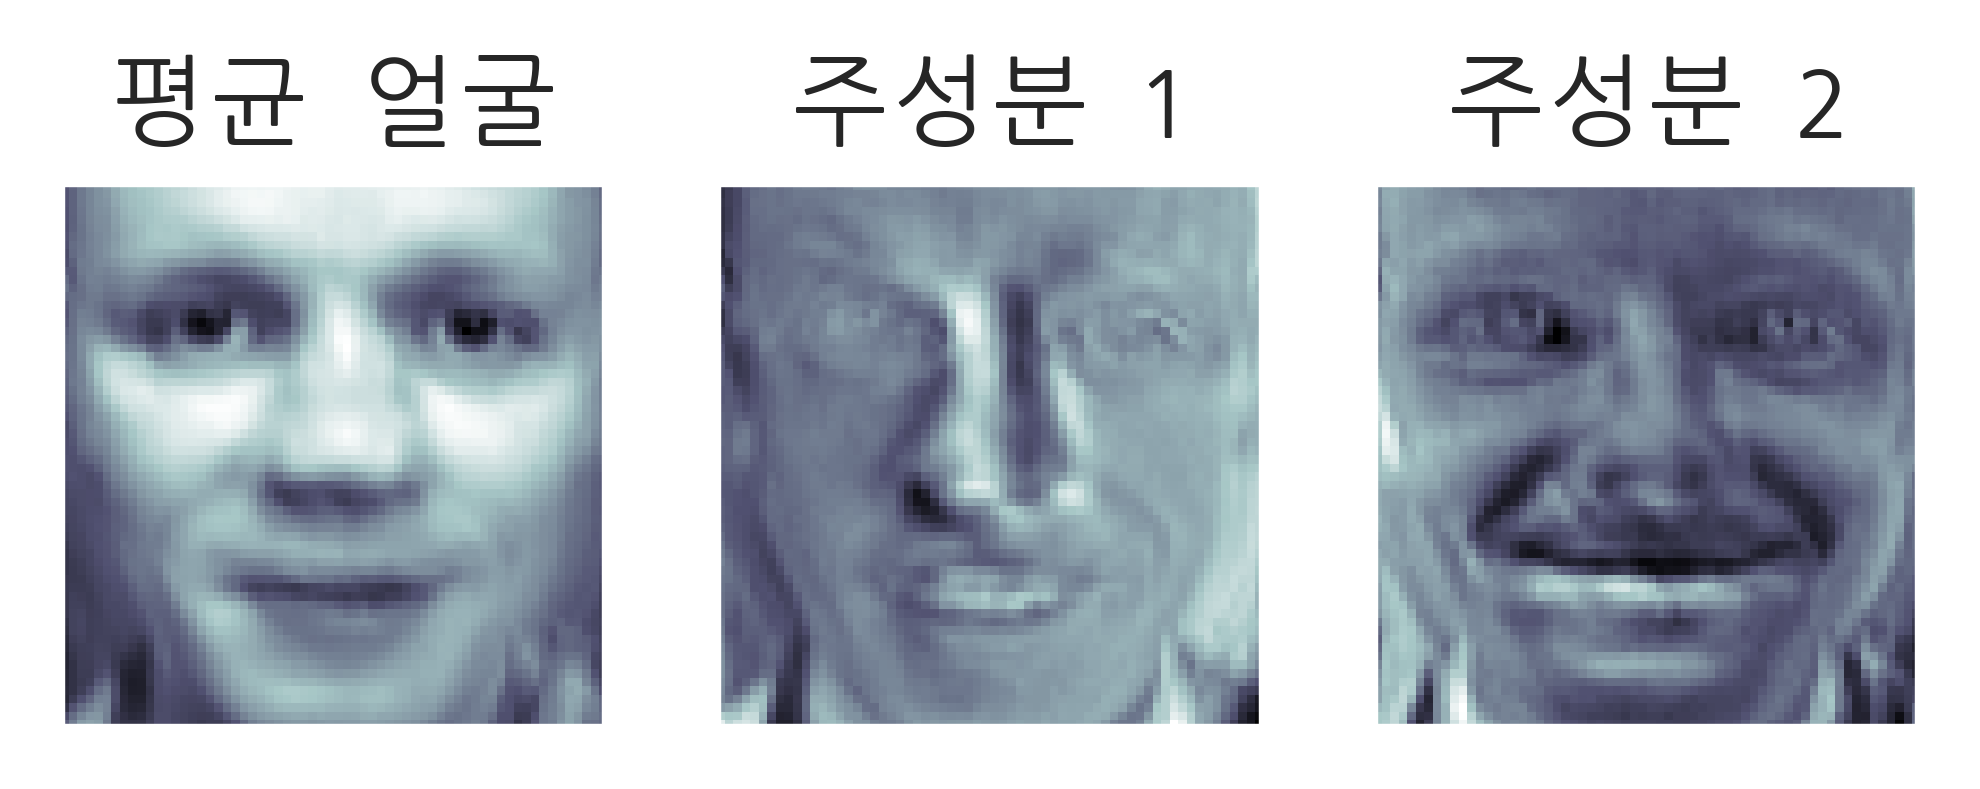

In [182]:
# 평균 얼굴과 주성분 1, 2의 얼굴 확인
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('평균 얼굴')
plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분 1')
plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분 2')
plt.show()

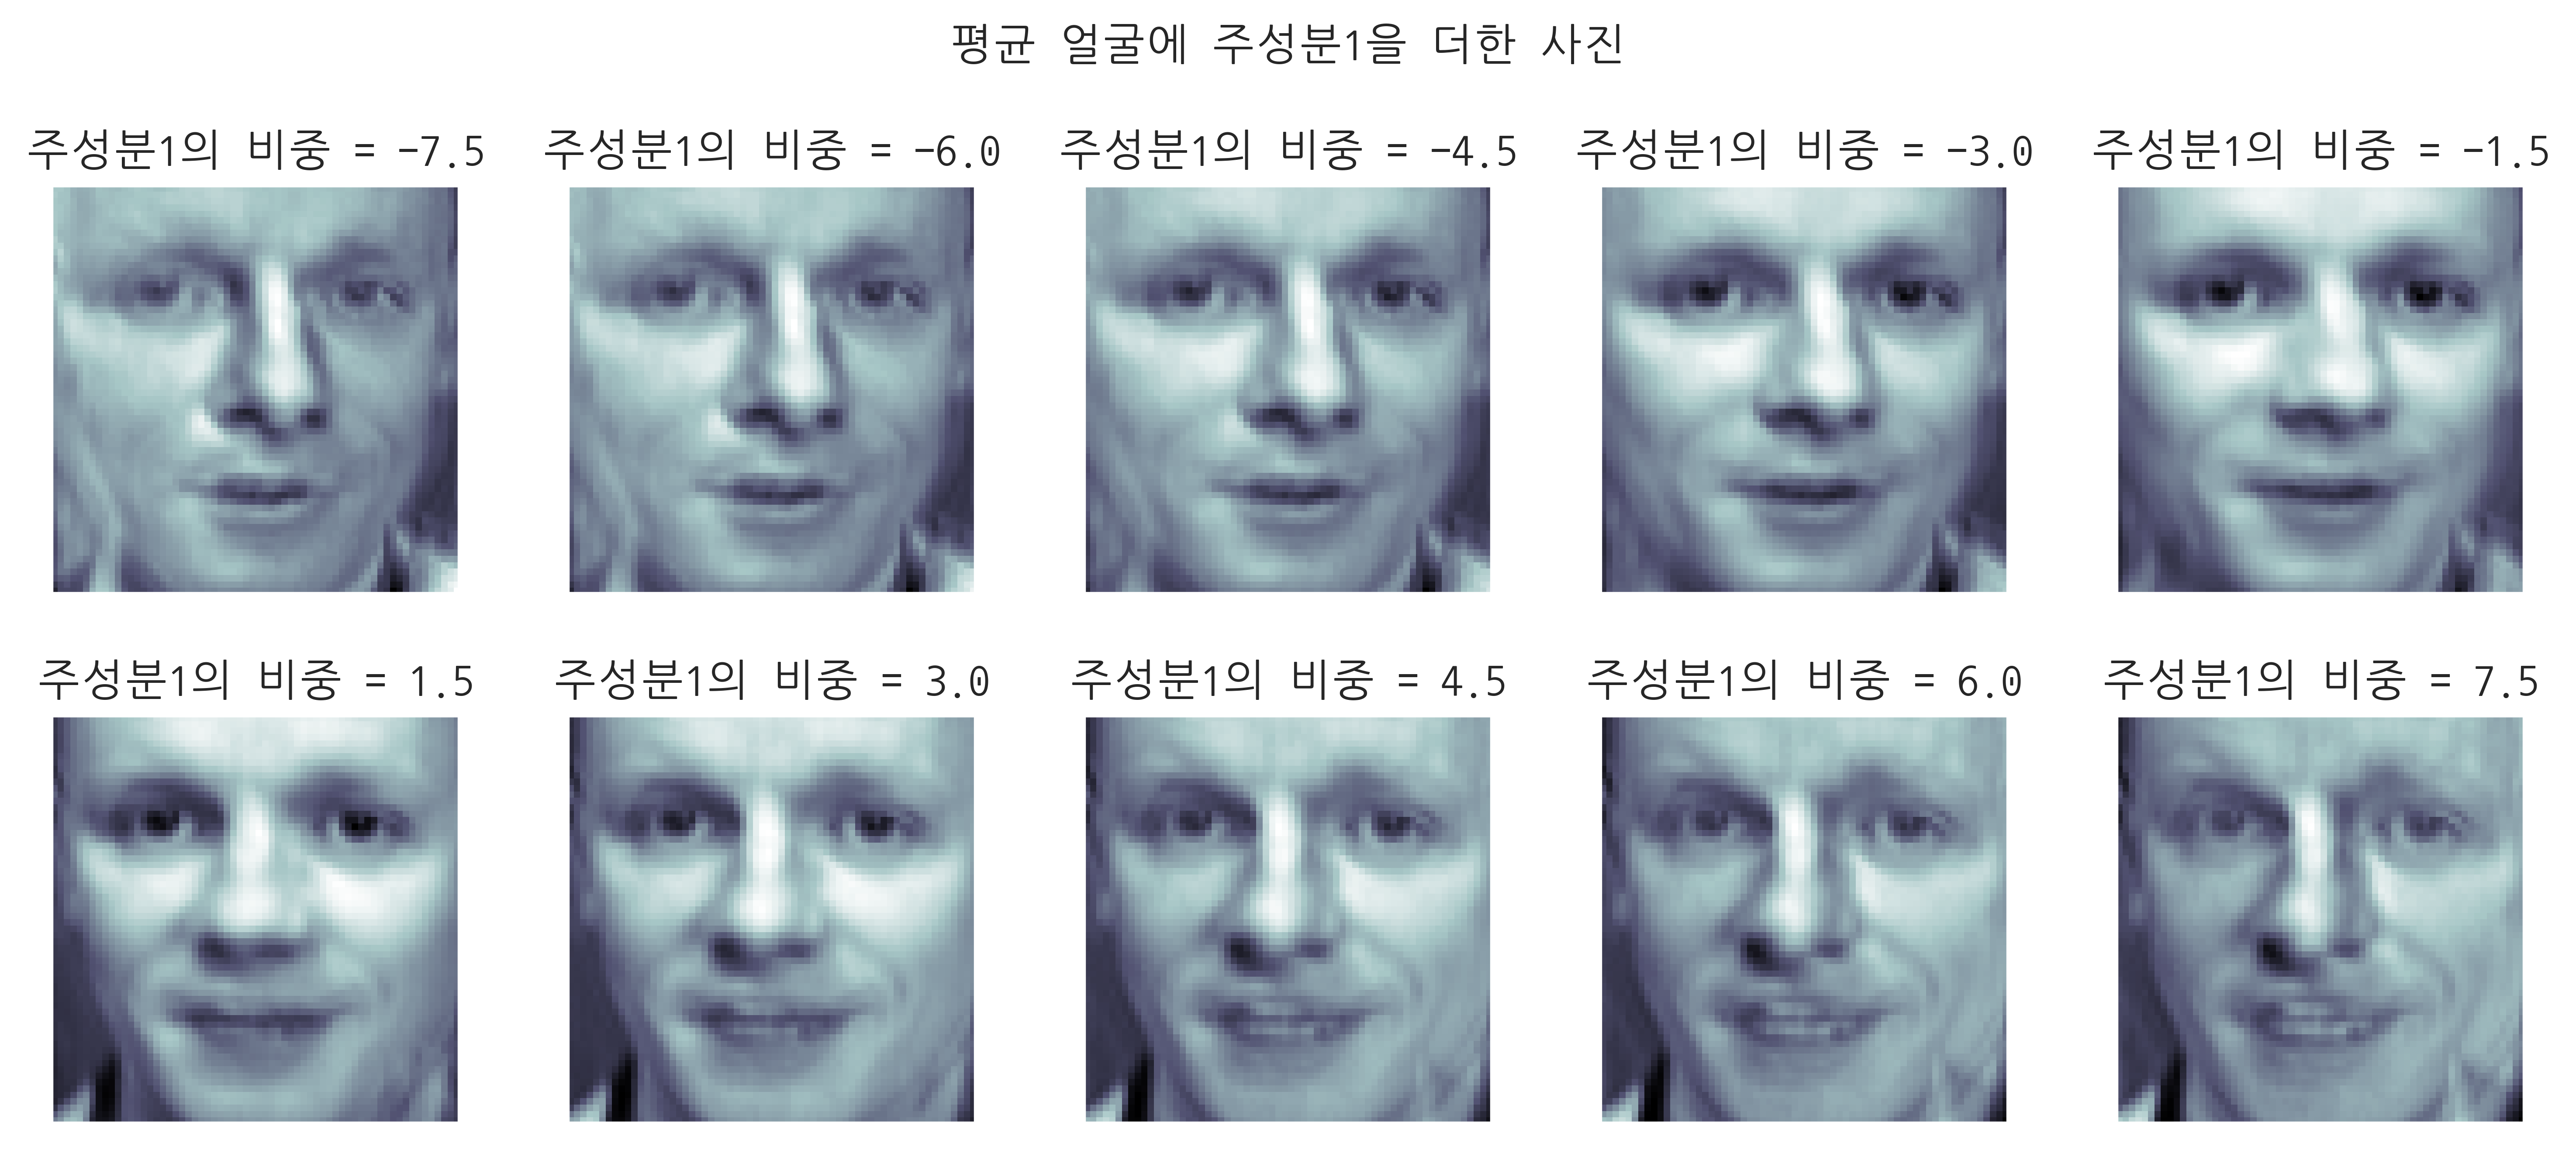

In [183]:
# 평균얼굴에 주성분1을 더한 사진 - 주성분이 -일때는 오른쪽을, +일때는 왼쪽을 바라보는 주성분으로 만들어짐
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k +1)
        w = 1.5 * (k -5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean+ w * face_p1, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분1의 비중 = {}'.format(w))
plt.suptitle('평균 얼굴에 주성분1을 더한 사진')
plt.tight_layout()
plt.show()

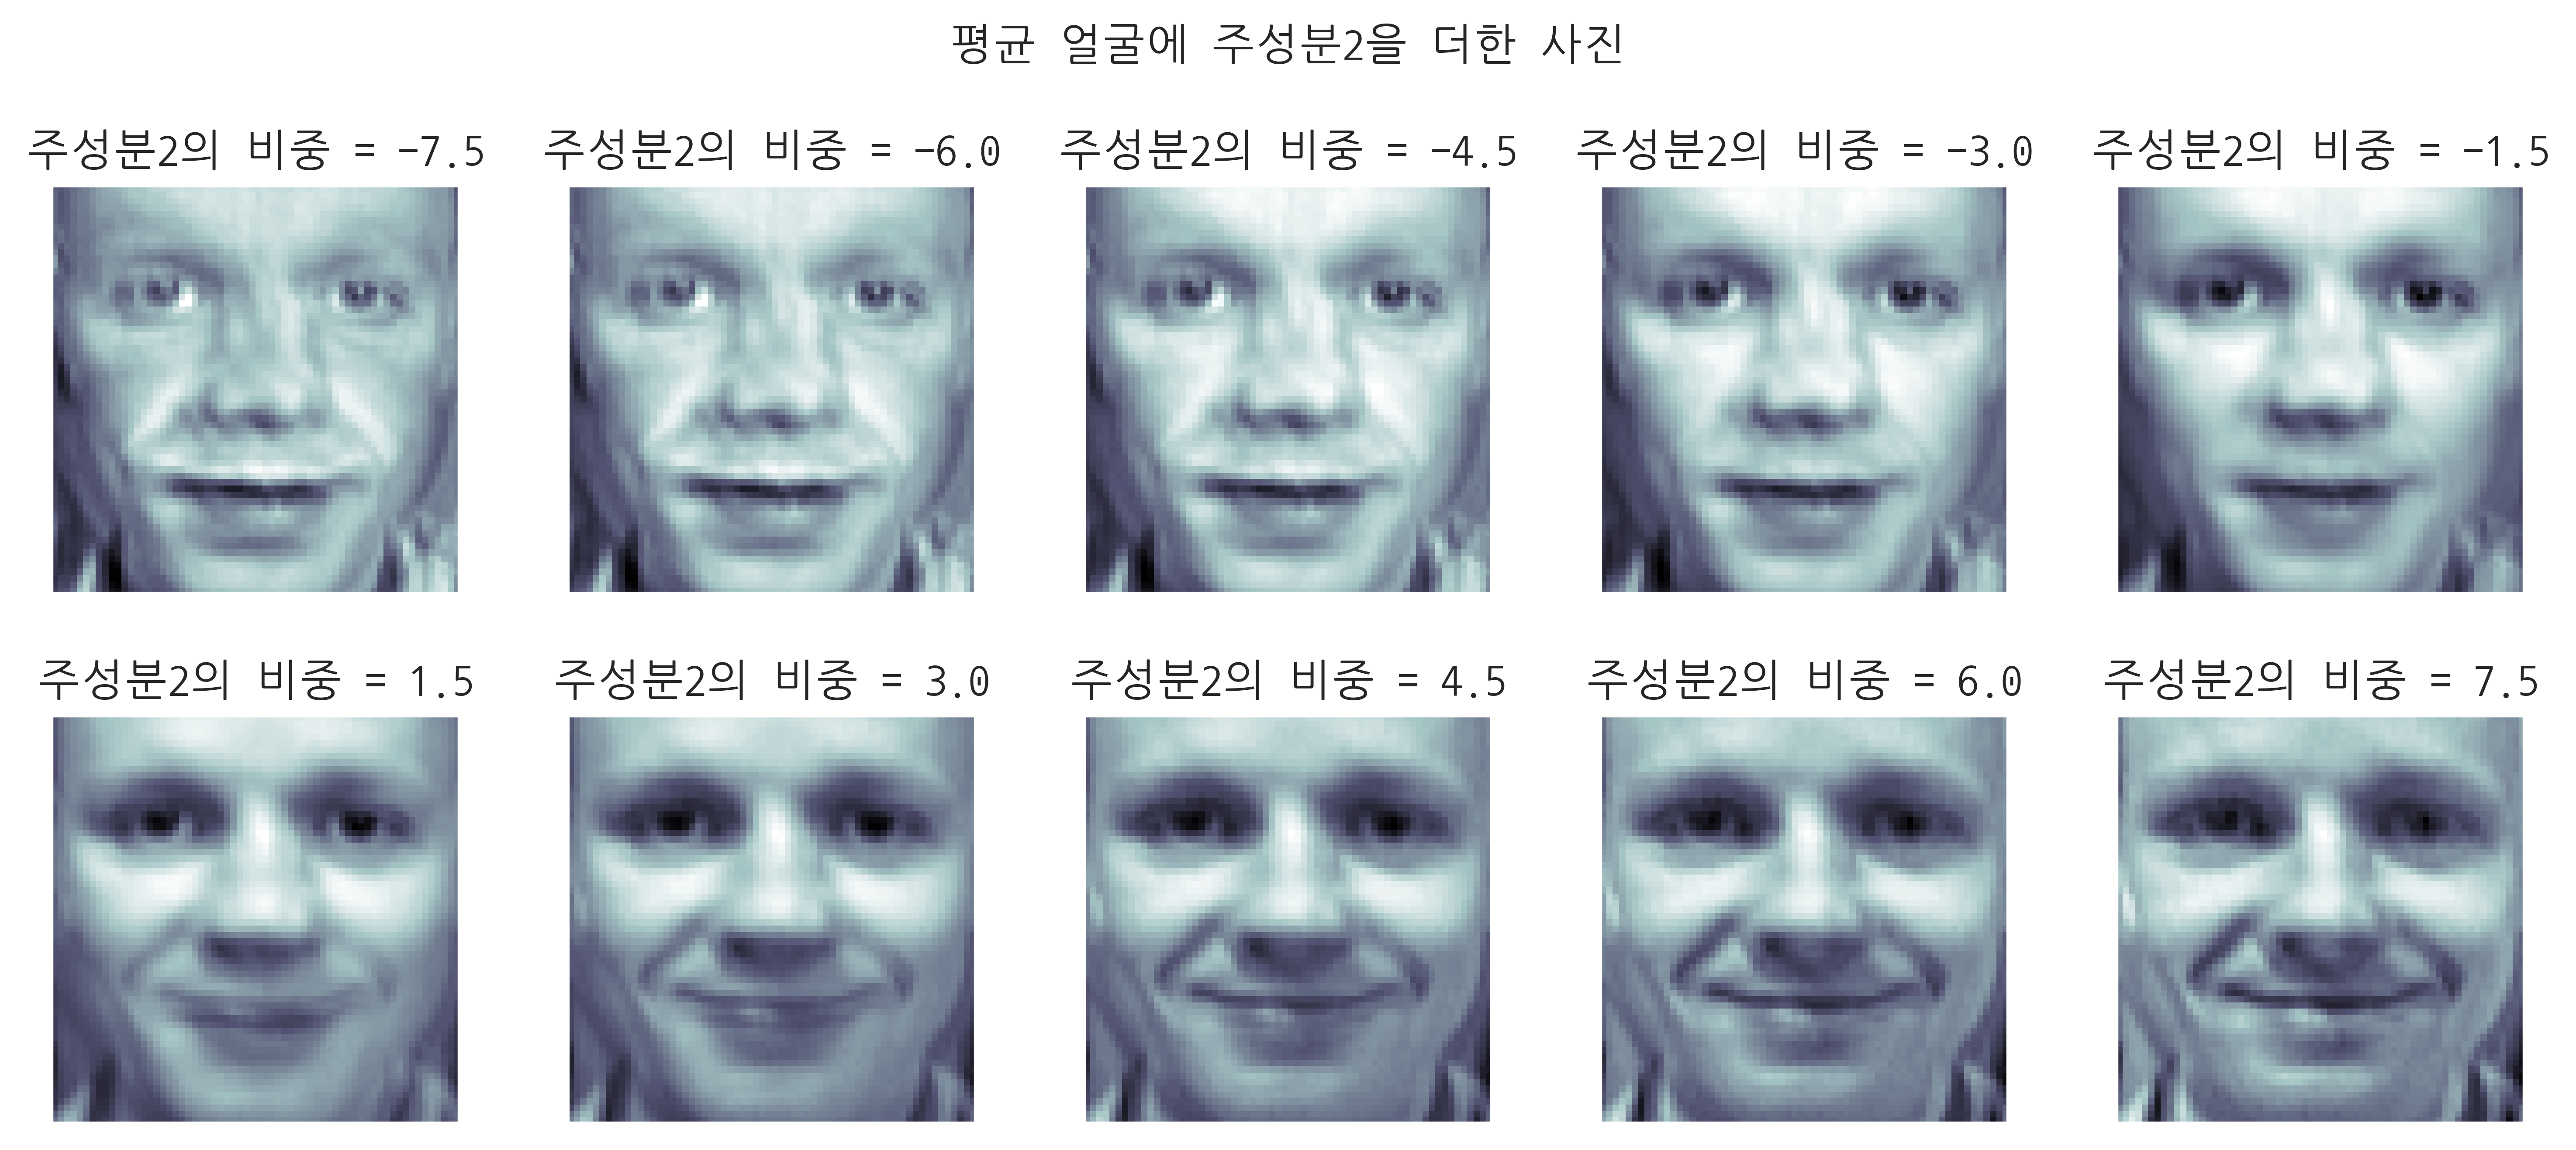

In [184]:
# 평균얼굴에 주성분2을 더한 사진 - 주성분이 -일떄는 웃지않다가, +로 갈수록 점점 웃음
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k +1)
        w = 1.5 * (k -5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean+ w * face_p2, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분2의 비중 = {}'.format(w))
plt.suptitle('평균 얼굴에 주성분2을 더한 사진')
plt.tight_layout()
plt.show()

In [185]:
# 연습문제 3.5.2
# 이미지 PCA
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()
k = 5 # 인물 사진 선택
faces = faces_all.images[faces_all.target == k]
# 4096 데이터를 2개로 압축함
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)  # 2차원 데이터로 변환
X3 = faces_all.data[faces_all.target == k] # X3로 저장
W3 = pca3.fit_transform(X3) # X3을 2차원으로 내림
X32 = pca3.inverse_transform(W3) # 2차원 평면으로 내린것을 다시 원래차원으로 복귀
face_mean = pca3.mean_.reshape(64,64) #평균 얼굴
face_p1 = pca3.components_[0].reshape(64,64) # 주성분 1는
face_p2 = pca3.components_[1].reshape(64,64) # 주성분 2는 

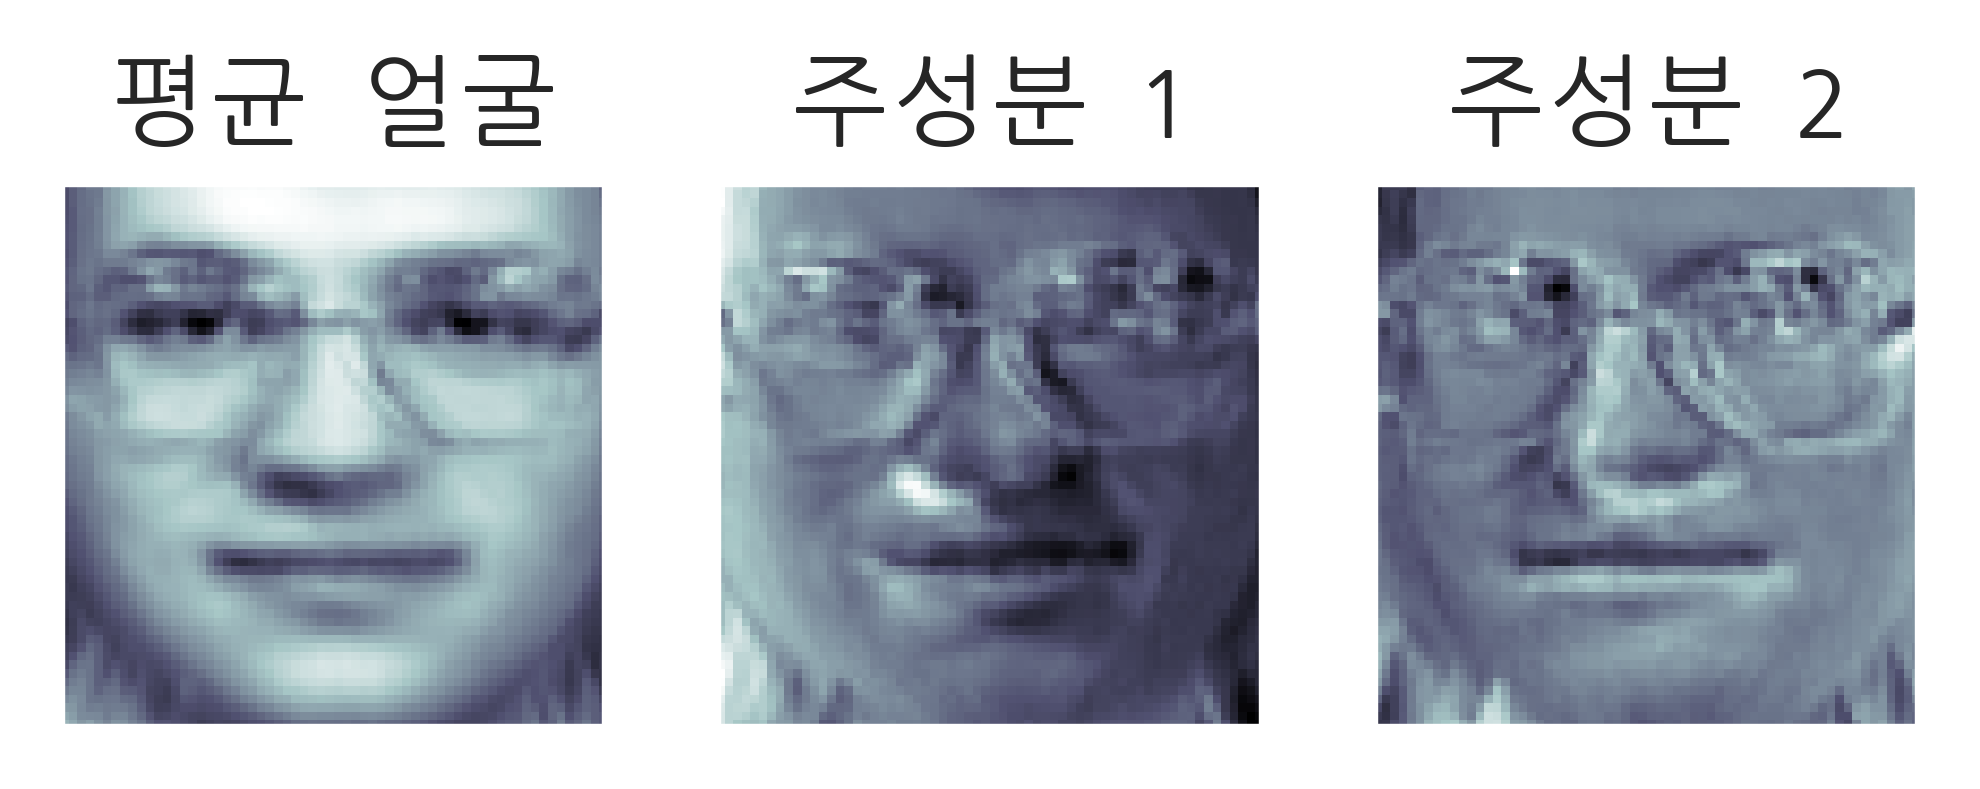

In [186]:
# 평균 얼굴과 주성분 1, 2의 얼굴 확인
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('평균 얼굴')
plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분 1')
plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title('주성분 2')
plt.show()

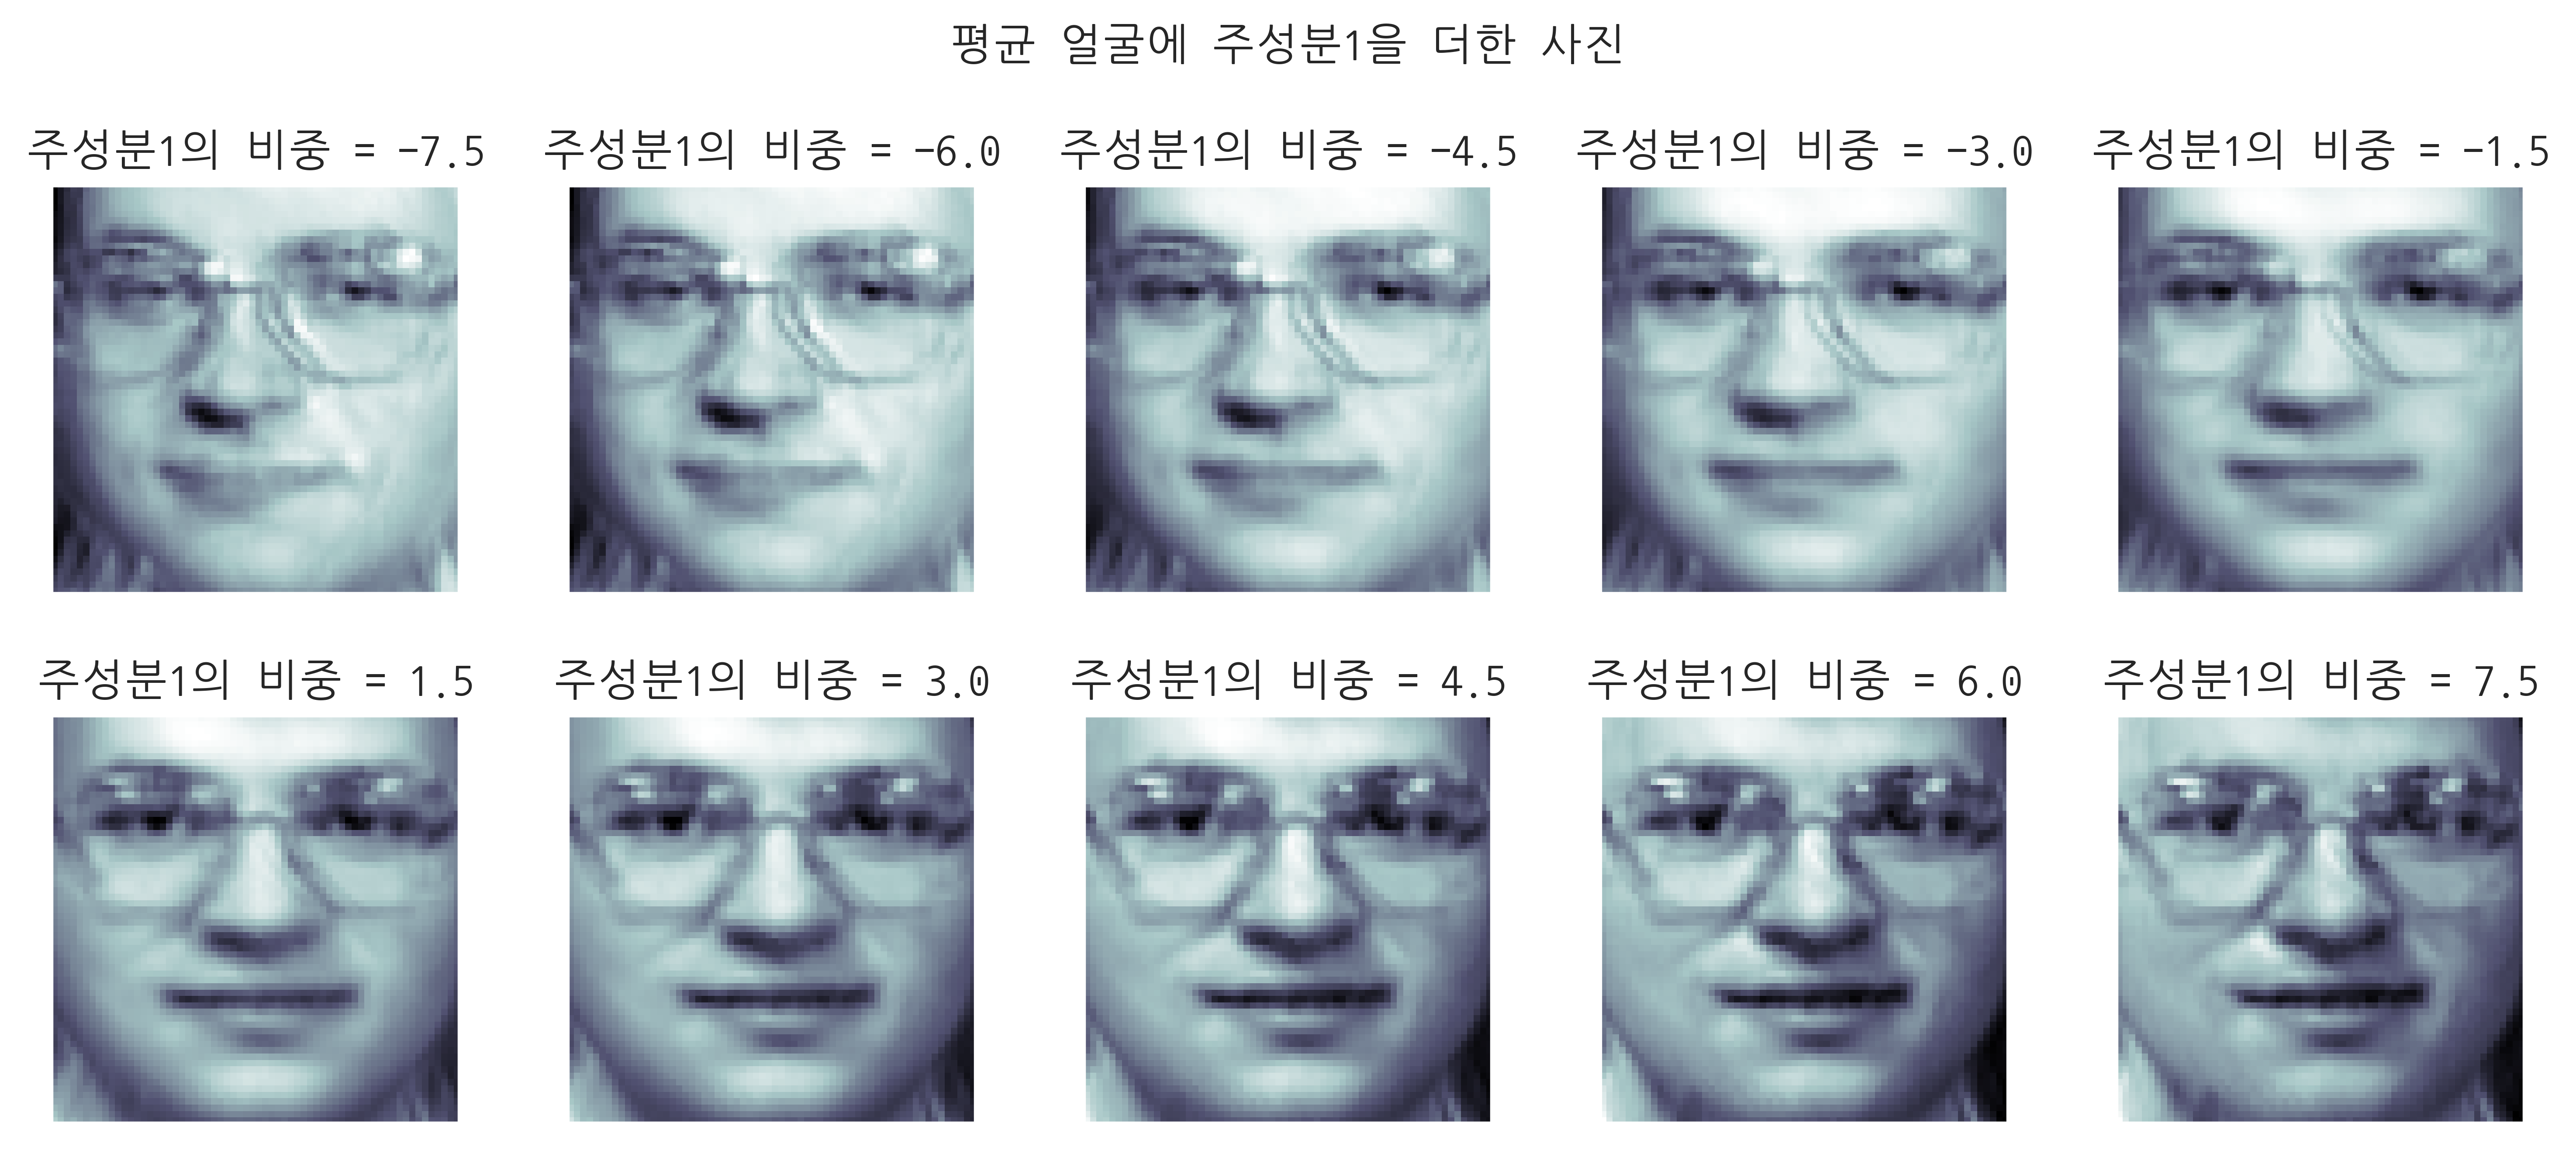

In [187]:
# 평균얼굴에 주성분1을 더한 사진 - 고개가 오른쪽
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k +1)
        w = 1.5 * (k -5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean+ w * face_p1, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분1의 비중 = {}'.format(w))
plt.suptitle('평균 얼굴에 주성분1을 더한 사진')
plt.tight_layout()
plt.show()

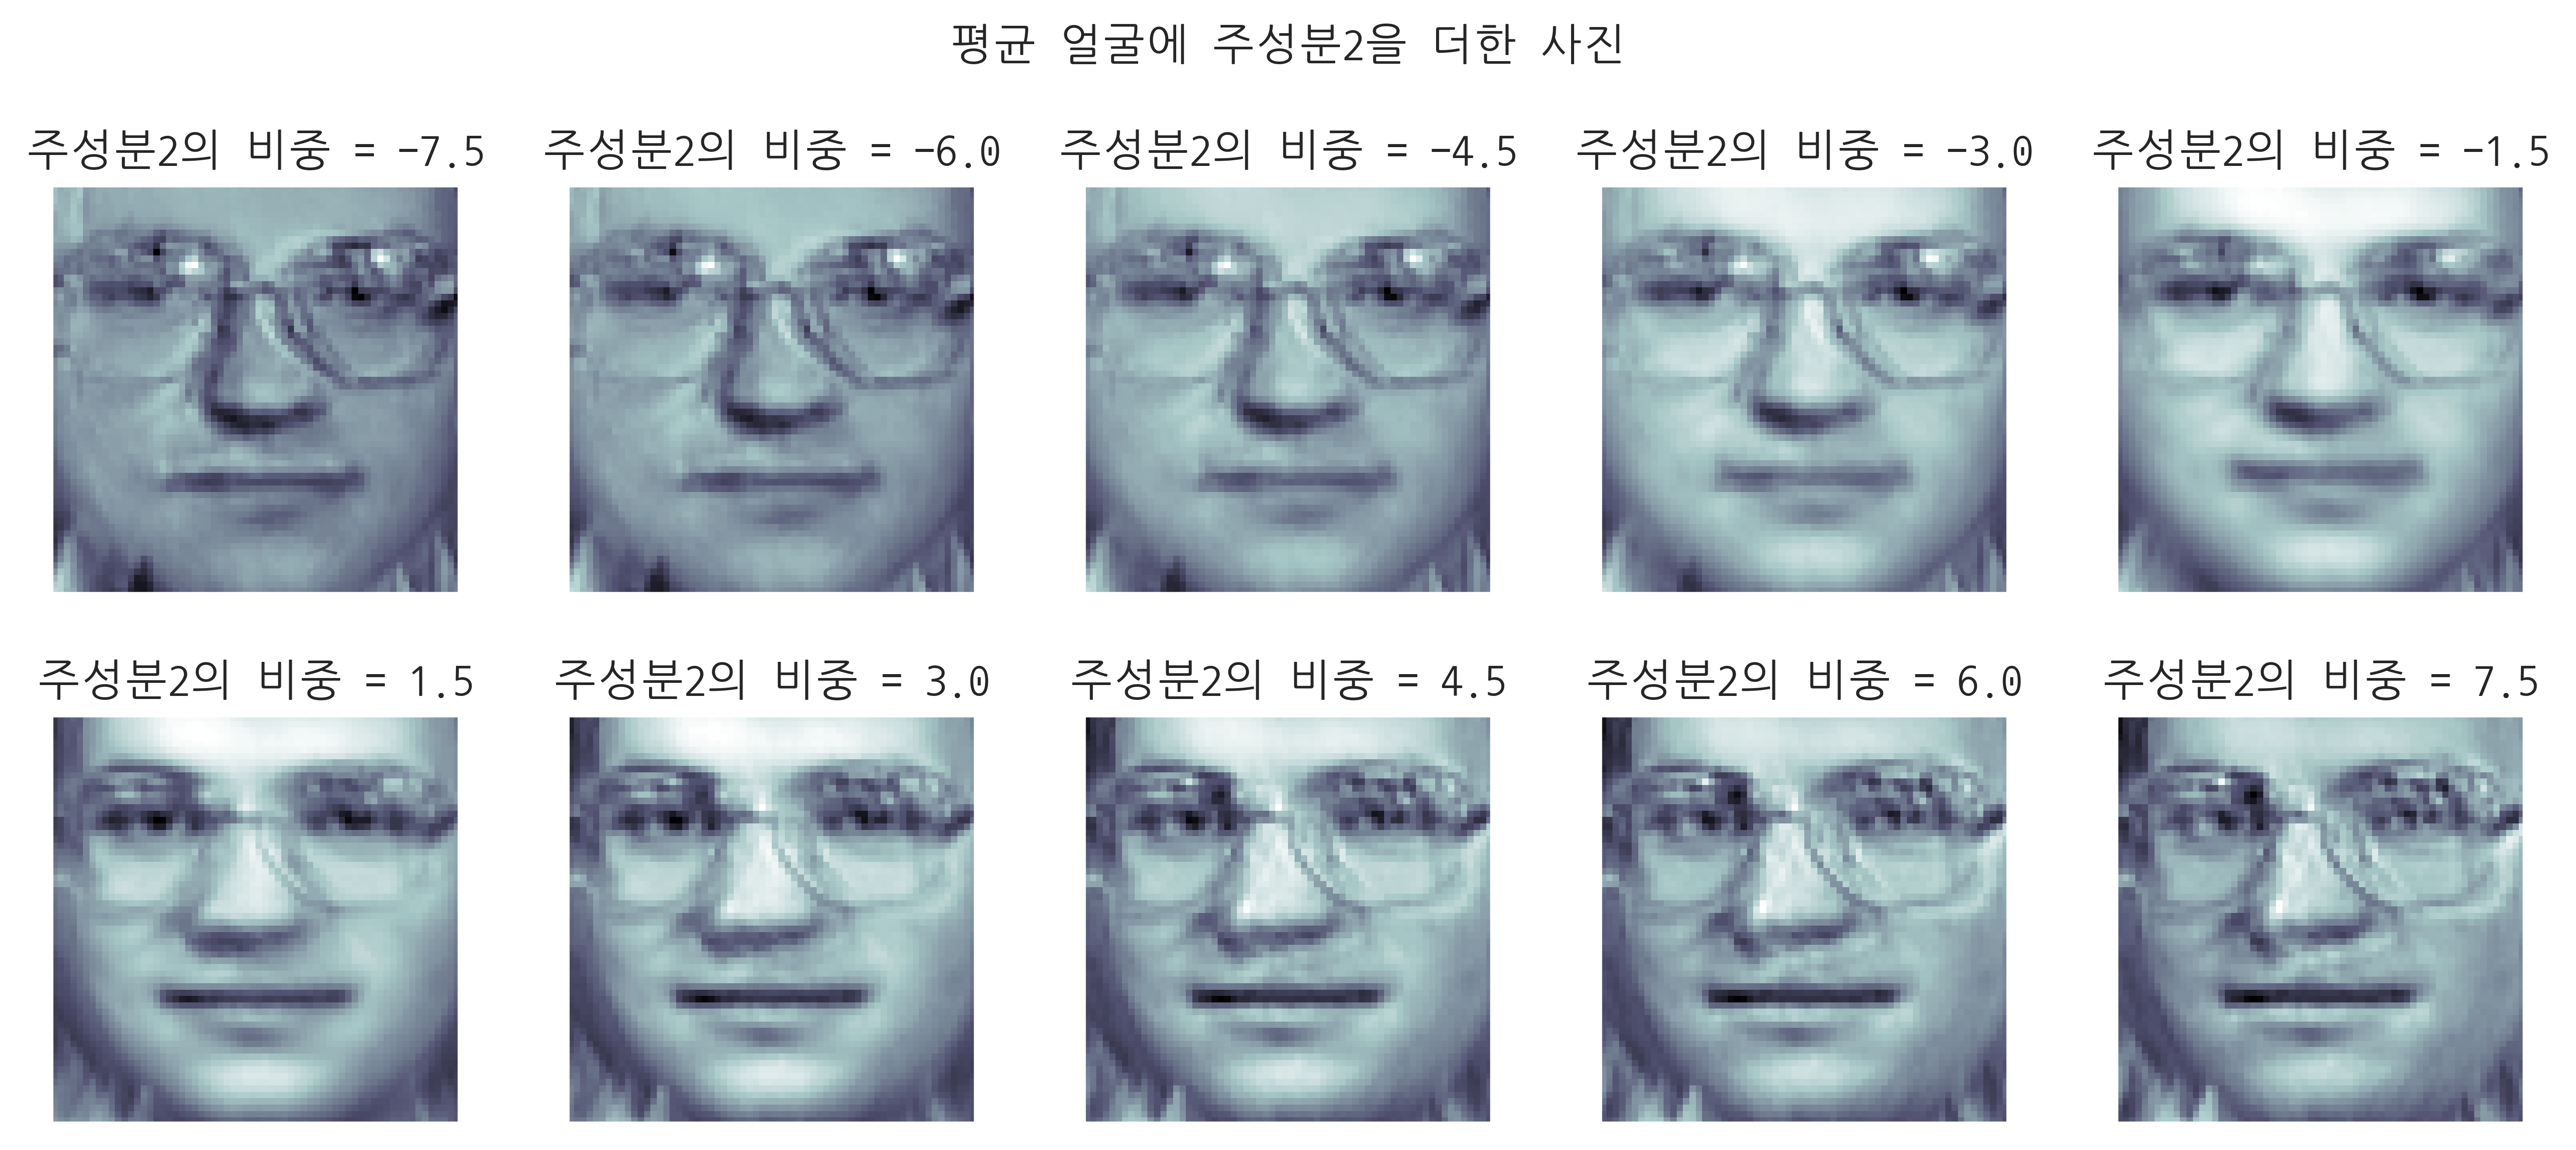

In [189]:
# 평균얼굴에 주성분2을 더한 사진 - 고개가 왼쪽
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0 , hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k +1)
        w = 1.5 * (k -5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean+ w * face_p2, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('주성분2의 비중 = {}'.format(w))
plt.suptitle('평균 얼굴에 주성분2을 더한 사진')
plt.tight_layout()
plt.show()

In [190]:
# 주식가격의 PCA